# 4.3
## 1.
### Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Ler os dados

In [9]:
dados_lidos = pd.read_csv("CO_data.csv")

### Variáveis

In [10]:
# Listas de paises e anos
areas_geo = ["Europe", "Germany", "Russia", "France", "Portugal"]
anos = list(range(2000, 2022))[::2]

# Definição das condições de filtragem.
condicao_anos = dados_lidos["year"].isin(anos)

### Obter dados dos anos pretendidos para as áreas geográficas em estudo.

In [11]:
dados_areas_geo = {}

for area_geo in areas_geo:
    condicao_area_geo = dados_lidos.country == area_geo
    dados_areas_geo[area_geo] = list(dados_lidos.loc[condicao_anos & condicao_area_geo, ["co2"]]["co2"])

dados_trabalho = pd.DataFrame(dados_areas_geo)
# dados_trabalho.insert(0, "year", anos)

In [12]:
# Espreitar os dados filtrados
dados_trabalho.head()

,Europe,Germany,Russia,France,Portugal
0,6158.767,899.352,1478.185,406.829,65.686
1,6254.075,899.450,1505.520,407.790,69.643
2,6431.065,886.637,1541.754,413.780,67.385
3,6520.084,877.939,1618.246,406.462,64.924
4,6402.666,854.508,1646.969,390.778,60.107


### a)

Em **Y** temos a variável dependente, que são os valores da Europa ("Europe").
Para **X** teremos o dataset das variáveis independente.
Depois é aplicar o algoritmo. 


In [21]:
X = dados_trabalho[areas_geo[1:]]
Xc = sm.add_constant(X)
Y = dados_trabalho["Europe"]
modelo = sm.OLS(Y, Xc)
resultado = modelo.fit()
print(resultado.params)

const      -1653.372466
Germany       -0.583607
Russia         2.095967
France        12.748025
Portugal       1.277526
dtype: float64


#### Formula geral

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \epsilon  $$

#### Modelo

$$ Y = -1653,37 - 0,58 . X_{Germany} + 2,09 . X_{Russia} + 12,74 . X_{France} + 1,27 . X_{Portugal} + \epsilon $$


### b)

#### Cálculo dos residuos

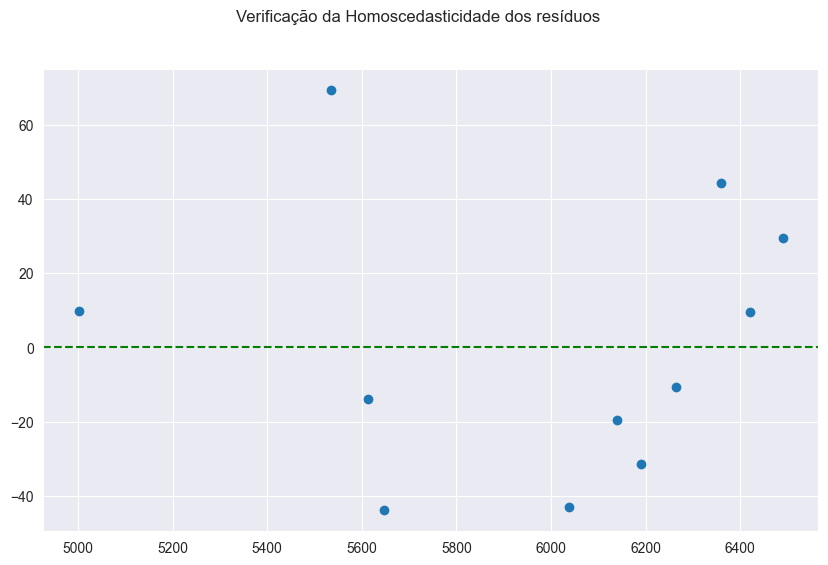

In [32]:
valores_ajustados = resultado.fittedvalues
residuos = resultado.resid

fig_residuos, axes_residuos = plt.subplots(figsize=(10, 6))
_ = fig_residuos.suptitle("Verificação da Homoscedasticidade dos resíduos")
_ = axes_residuos.axhline(y=0, color="green", linestyle="--")
_ = axes_residuos.scatter(valores_ajustados, residuos),
# _ = fig_residuos.xlabel("Valores ajustados")
# _ = fig_residuos.ylabel("Resíduos")

# TODO: Colocar labels

# fig_residuos.show()  # Em jupyter gera aviso.


In [36]:
#### Normalidade dos resíduos

In [35]:
normalidade_residuos = stats.shapiro(residuos)
print(f"pvalue: {normalidade_residuos.pvalue:.3}")

pvalue: 0.571


##### QQ-Normal-plot

TP4.6 d)

#### Independência dos resíduos

TODO: durbin_watson
TP4.8 d)

### c) 

Estudo da Multicolinearidade: Fator de inflação de variância - VIF

TODO: TP4.8 e)

variance_inflation_factor

#### d)

TP4.7 c)



In [ ]:
residuos.rsquared_adj

#### e)

2015

TP4.6 b)

Como o valor de p-value é muito baixo (próximo de zero) rejeitamos a hipótese nula, ou seja, consideramos que as variâncias não são iguais.